In [64]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

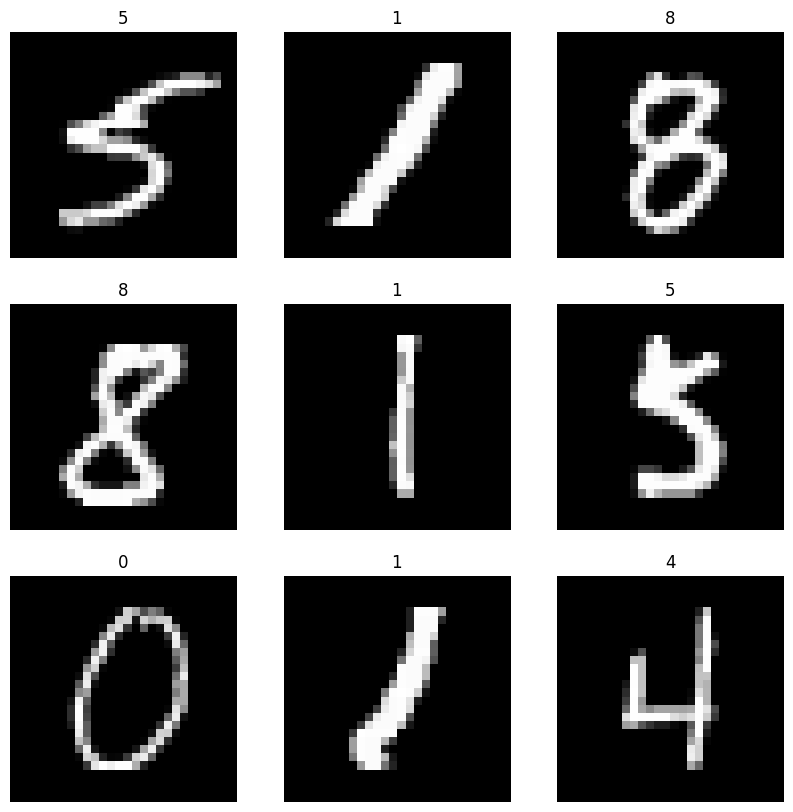

In [65]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the normalization function
def normalize(image, labels):
    return tf.cast(image, tf.float32) / 255.0, labels

# Load the MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Prepare the training dataset
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

# Prepare the test dataset
ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

# Define the class names for MNIST
classes = [str(i) for i in range(10)]

# Plot a batch of images
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image = np.squeeze(images[i])  # MNIST images are already 28x28
        plt.imshow(image, cmap='gray')  # Use grayscale colormap
        plt.title(classes[labels[i].numpy()])  # Convert Tensor to NumPy array
        plt.axis("off")

plt.show()


In [66]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')]
        
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

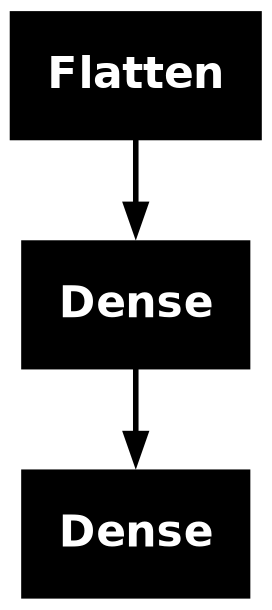

In [68]:
tf.keras.utils.plot_model(model)

In [69]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [77]:
history=model.fit(ds_train,validation_data=ds_test,epochs=6
                 )

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9819 - val_loss: 0.0806
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9761 - val_loss: 0.1066
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9974 - loss: 0.0077 - val_accuracy: 0.9798 - val_loss: 0.0921
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9802 - val_loss: 0.0877
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 5.9957e-04 - val_accuracy: 0.9813 - val_loss: 0.0879
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 4.7581e-04 - val_accuracy: 0.9810 - val_loss: 0.0887


In [73]:
for e in history.history:
    print(e)

accuracy
loss
val_accuracy
val_loss


In [83]:
model.evaluate(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0911


[0.08871342986822128, 0.9810000061988831]

In [85]:
pred=model.predict(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [89]:
pred[1]

array([1.1574389e-21, 1.1764656e-19, 5.0678164e-20, 1.6339016e-13,
       2.6486939e-23, 9.9999923e-01, 1.2362582e-14, 2.3117099e-18,
       6.6270735e-07, 1.4467657e-15], dtype=float32)